In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import OrderedDict, Counter
import torch
from torch import nn, optim
import torch.nn.functional as F

In [2]:
#reading the data
train_data = pd.read_csv('train.csv')
train_data = train_data.drop('id', axis=1)
train_data.drop_duplicates()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
5,0,5,1,4,0,0,0,0,0,1,...,4,2,0,9,0,1,0,1,1,1
6,0,2,1,3,1,0,0,1,0,0,...,3,0,0,10,0,1,0,0,1,0
7,0,5,1,4,0,0,1,0,0,0,...,7,1,3,6,1,0,1,0,1,0
8,0,5,1,3,1,0,0,0,1,0,...,4,2,1,5,0,1,0,0,0,1
9,1,1,1,2,0,0,0,1,0,0,...,3,5,0,6,0,1,0,0,1,0


In [3]:
labels = np.array(train_data['target'])
train_data = train_data.drop('target',axis=1)

In [4]:
#train_data.info()

In [5]:
all_columns = train_data.columns
categorical_columns = [x for x in all_columns if x[-3:] == 'cat']
binary_columns = [x for x in all_columns if x[-3:] == 'bin']
numeric_columns = [x for x in all_columns if x[-3:] != 'bin' and  x[-3:] != 'cat' ]
c = Counter(labels)

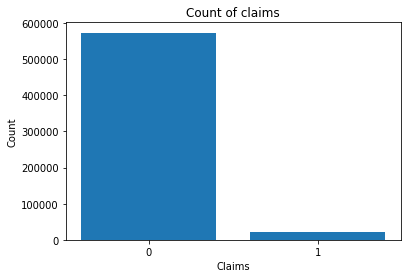

In [11]:
plt.bar(c.keys(), c.values())
plt.xlabel('Claims')
plt.xticks([0,1])
plt.ylabel('Count')
plt.title('Count of claims')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.20, random_state=3)
X =  torch.from_numpy(np.array(X_train)).float()
y =  torch.from_numpy(np.array(y_train)).long()
X_test =  torch.from_numpy(np.array(X_test)).float()
y_test =  torch.from_numpy(np.array(y_test)).long()

0.03


C:\Users\bduraiswam007\Documents\Anaconda3\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\bduraiswam007\Documents\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([476169])) that is different to the input size (torch.Size([476169, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 10/200..  Training Loss: 0.306.. 
Epoch: 20/200..  Training Loss: 0.224.. 
Epoch: 30/200..  Training Loss: 0.201.. 
Epoch: 40/200..  Training Loss: 0.190.. 
Epoch: 50/200..  Training Loss: 0.183.. 
Epoch: 60/200..  Training Loss: 0.179.. 
Epoch: 70/200..  Training Loss: 0.175.. 
Epoch: 80/200..  Training Loss: 0.172.. 
Epoch: 90/200..  Training Loss: 0.169.. 
Epoch: 100/200..  Training Loss: 0.166.. 
Epoch: 110/200..  Training Loss: 0.164.. 
Epoch: 120/200..  Training Loss: 0.162.. 
Epoch: 130/200..  Training Loss: 0.161.. 
Epoch: 140/200..  Training Loss: 0.161.. 
Epoch: 150/200..  Training Loss: 0.160.. 
Epoch: 160/200..  Training Loss: 0.160.. 
Epoch: 170/200..  Training Loss: 0.159.. 
Epoch: 180/200..  Training Loss: 0.159.. 
Epoch: 190/200..  Training Loss: 0.158.. 
Epoch: 200/200..  Training Loss: 0.158.. 


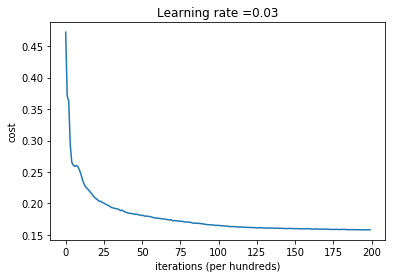

In [13]:
import safe_driver_model
hidden_layers = np.array([27, 10])
testModel = safe_driver_model.Network(X.shape[1], 1, hidden_layers)
testModel.learning_rate = 0.03
safe_driver_model.train(testModel, X, y, 200, 10)

In [14]:
#prediction
y_pred, accuracy = safe_driver_model.predict(testModel,X_test, y_test)
print('Accuracy: {}%'.format(str(accuracy)))

Accuracy: 96.44246196752434%
